<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/master/05_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando el Espacio

In [ ]:
#! rm -r Colegio_Invisible

In [ ]:
! pip install eciespy eth_keys cryptos qrcode base58 
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

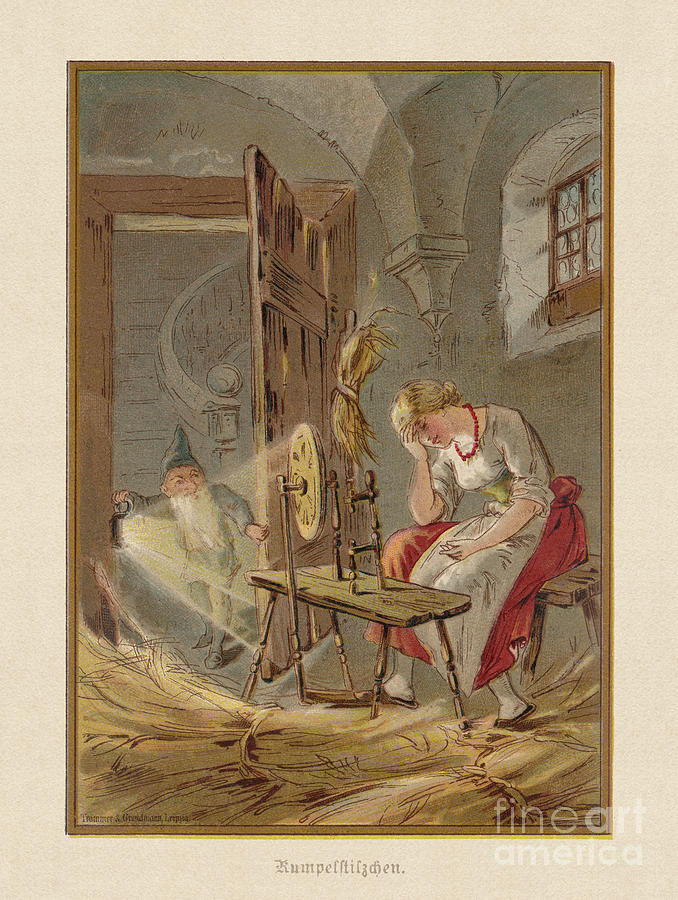

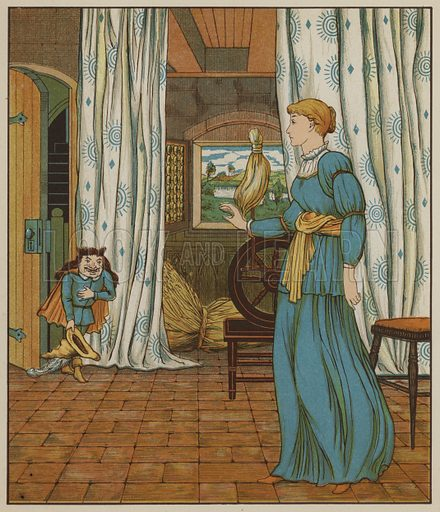

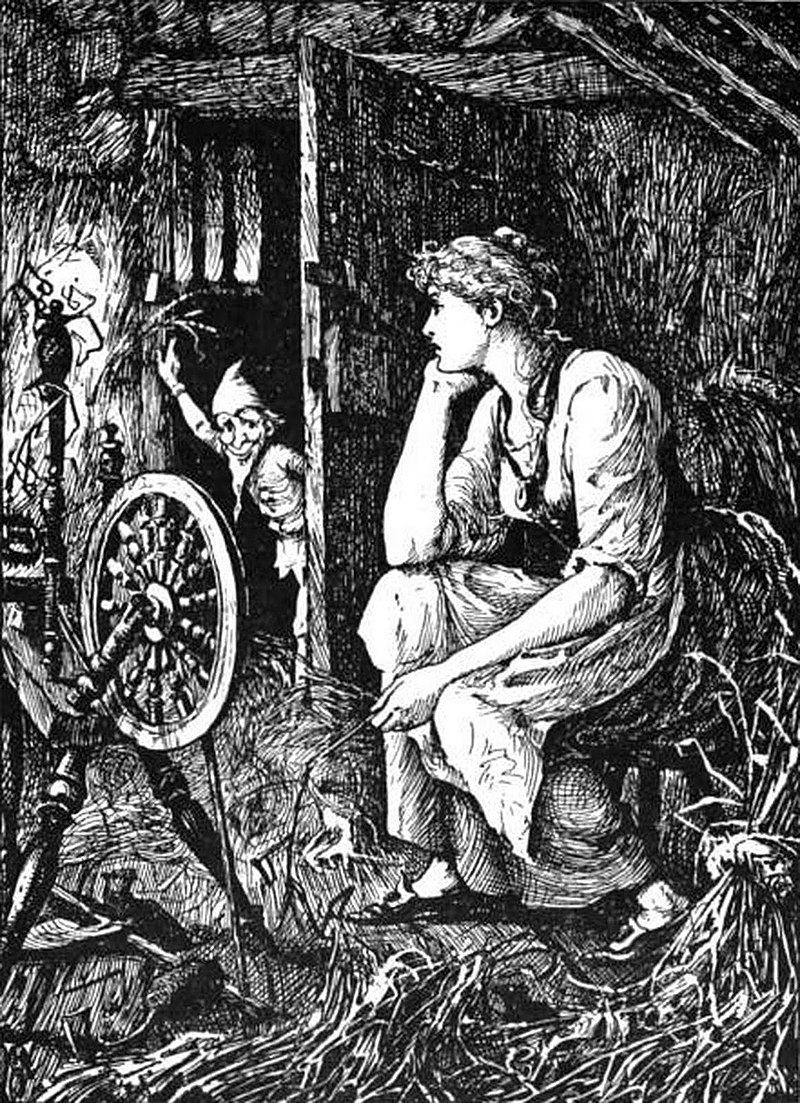

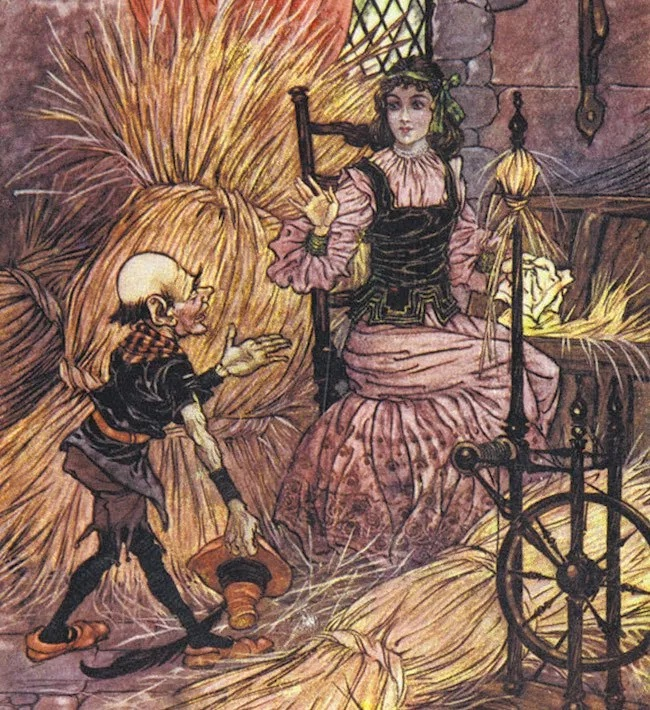

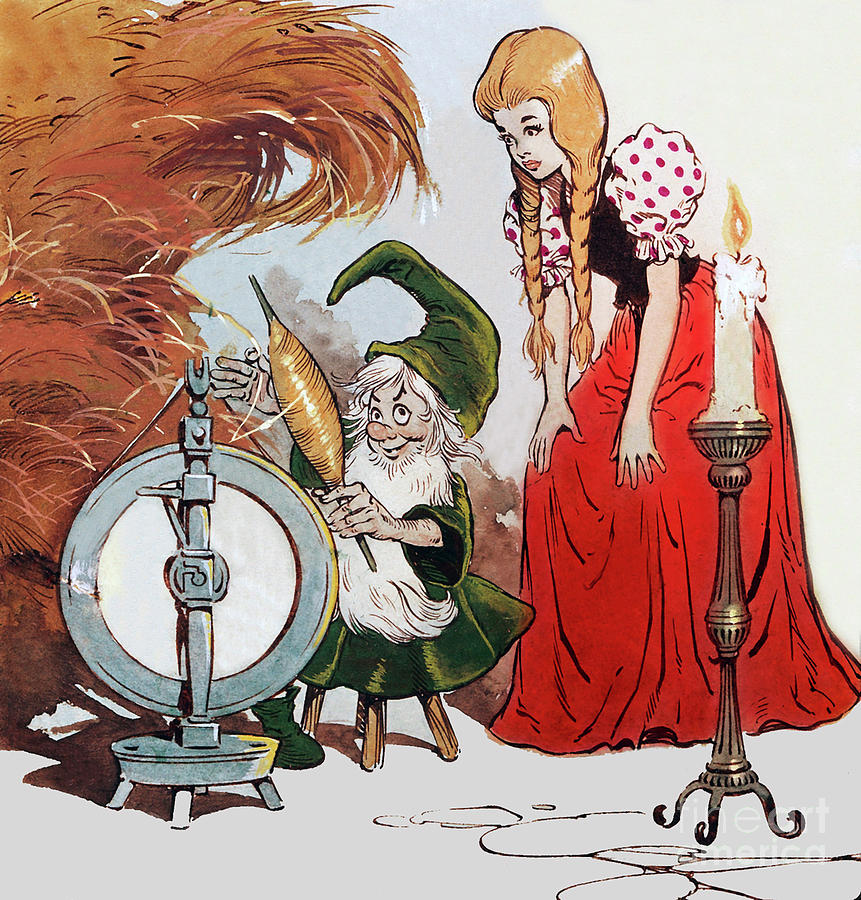

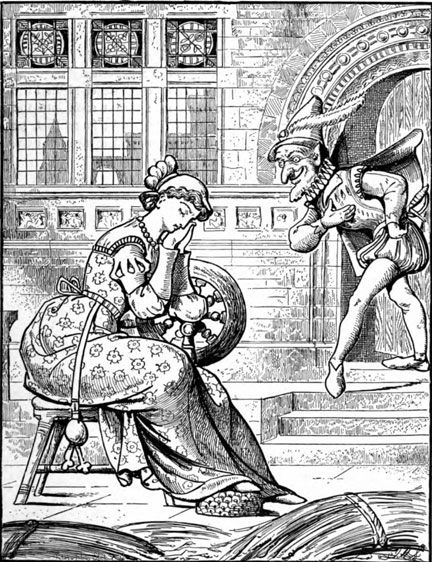

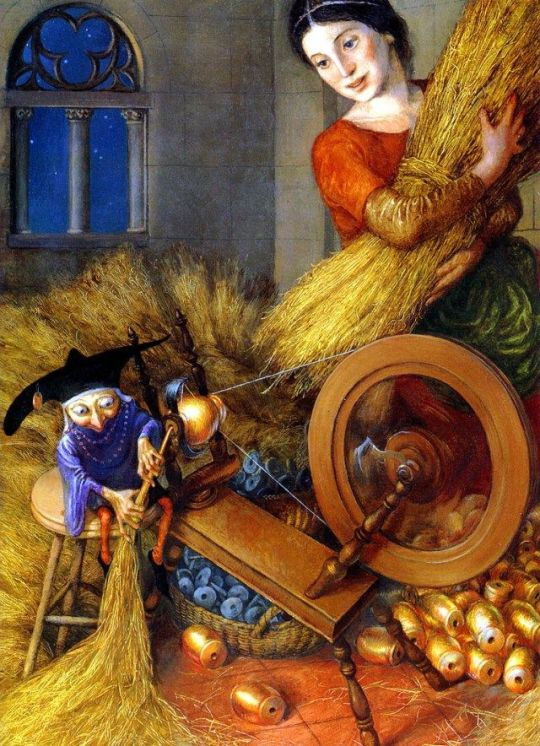

In [100]:
from IPython.display import Image 
import os
imgs = [img for img in os.listdir('Colegio_Invisible/img') if 'rum_' in img]
for img in sorted(imgs)[1:]:
    path = f'Colegio_Invisible/img/{img}'
    show=Image(path)
    display(show)

# Esquema (Outline)

Crear funciones para generar pares de claves y direcciones de criptomonedas.
***
Create functions for generating key pairs and cryptomoneda addresses.

# Objetivos (Goals)

- comprender el concepto de direcciones de criptomonedas \
(understand concept of cryptomoneda addresses)
- comprender el mapeo unidireccional de la clave privada a la pública, y de la pública a la dirección \
(understand one-way mapping from private key to public key, and from public key to address) 
- ser capaz de usar la función para generar un nuevo par de claves y archivos de direcciones \
(use function to generate new key pair and address files)
- guardar archivos de claves localmente y en Google Drive \
(save keyfiles locally and on google drive)
- ejecutar a mano el proceso de generación de direcciones \
(exectute address generation process by hand)
- comprender la codificación `base58` de Satoshi \
(understand Satoshi's `base58` encoding) 
- comprender la codificación **WIF** para claves privadas \
(understand **WIF** [Wallet Import Format] encoding for private keys)
- convertir entre claves privadas WIF y hexadecimales \
(convert between WIF and hex private keys)

# Private Keys, Public Keys and Addresses

<br></br>
<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/prv_pub_addr.png" width="800"/>
</div>

In order to play the cryptocurrency game we need to be able to manage private keys, public keys and addresses.

- **private key** you know from asymmetric cryptography. We are using ECC and the Secp256k1 curve. This is made of 256 bits of entropy. 
- **public key** you know from asymmetric cryptography. This key is derived from the private key.
- **address** is a series of hashes of the public key and more often a `base58` encoding.

LINKS:
- https://en.bitcoin.it/wiki/Secp256k1
- https://en.bitcoin.it/wiki/Wallet_import_format
- https://en.bitcoin.it/wiki/Technical_background_of_version_1_Bitcoin_addresses
- https://en.bitcoin.it/wiki/Base58Check_encoding

# Imports and Definitions

In [ ]:
import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def save_privkey(privkey,privkey_filepath,password=None):
    if password==None:
        while True:
                password = getpass.getpass("Input password for encrypting keyfile: ")
                password_2 = getpass.getpass("Repeat password for encrypting keyfile: ")
                if password==password_2:
                    print('\nPasswords match...')
                    break
                else:
                    print('\nPasswords do not match...')
    encrypted_bytes=ecies.aes_encrypt(key=hashlib.sha256(password.encode()).digest(),
                                      plain_text=privkey.to_bytes())
    open(privkey_filepath,'wb').write(encrypted_bytes)
    print(f'Password protected file written to {privkey_filepath} containing {encrypted_bytes.hex()}')
    
def save_pubkey(pubkey,pubkey_filepath):
    open(pubkey_filepath,'wb').write(pubkey.to_bytes())
    print(f'File written to {pubkey_filepath} containing {pubkey.to_bytes().hex()}')
    
def save_addr(addr,addr_filepath):
    open(addr_filepath,'wb').write(addr.encode())
    print(f'Address written to {addr_filepath} containing {addr}')

def make_qr(data,image_path=None):
    qr = qrcode.QRCode(version=1,box_size=5,border=2)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill='black', back_color='white')
    if image_path!=None:
        img.save(image_path)
    return img
    
def gen_save_keys_addr(basename_filepath,password=None,coin='Doge'):
    if os.path.isfile(basename_filepath+'_prv.enc'):
        privkey2save=import_privKey(basename_filepath+'_prv.enc',password)
    else:
        privkey2save = ecies.utils.generate_eth_key()
    pubkey2save = privkey2save.public_key    
    save_privkey(privkey2save,basename_filepath+'_prv.enc',password=password)
    save_pubkey(pubkey2save,basename_filepath+'_pub.bin')
    if coin[0].lower()=='d':
      doge = cryptos.Doge()
    else:
      doge = cryptos.Bitcoin()
    addr2save=doge.pubtoaddr('04'+pubkey2save.to_bytes().hex())
    save_addr(addr2save,basename_filepath+'_addr.bin')
    return make_qr(addr2save,basename_filepath+'_addr.png')
    
def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

# Making Private, Public and Address Files

## Starting from No Keys

In [ ]:
! ls

In [ ]:
! mkdir llaves

In [ ]:
#! rm -r llaves.zip

## Starting from Keys on Google Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
#! unzip llaves.zip

## Starting from Keys on Local Drive

In [ ]:
#from google.colab import files
#fu=files.upload();

In [ ]:
#! unzip llaves.zip

## Generating Keys and Crypto Address

If the private key file already exists the function will use the password to open the file and generate address from that saved key

In [ ]:
! ls llaves

In [ ]:
gen_save_keys_addr('llaves/mi',password='',coin='D')

In [ ]:
privKey=import_privKey('llaves/mi_prv.enc','')
privKey,type(privKey)

In [ ]:
pubKey=import_pubKey('llaves/mi_pub.bin')
pubKey,type(pubKey)

In [ ]:
addr=import_addr('llaves/mi_addr.bin')
addr

# Saving Keys

In [ ]:
! zip -r llaves.zip llaves

Use the side menu to manage files.

Download `llaves.zip` to your local computer using the GUI.

Or you could uncomment and run the following cell.

In [ ]:
from google.colab import files
f=files.download('llaves.zip');

## Saving on Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! mkdir drive/MyDrive/cinv

In [ ]:
! cp llaves.zip drive/MyDrive/cinv/llaves2.zip 

# Address Generation Details

Generating an address for Ethereum:

use last 20 bytes of the **Keccak256** hash of the public key 

In [ ]:
from Crypto.Hash import keccak

In [ ]:
kek=keccak.new(digest_bits=256)
kek.update(pubKey.to_bytes())
'0x'+kek.hexdigest()[-40:]

In [ ]:
pubKey.to_checksum_address()



<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/PubKeyToAddr.png" width="300"/>
</div>

If we wanted to do the address generation by hand, it would go as follows.

1) Start with the **PUBLIC KEY** prepended with byte **`04`**

In [ ]:
pubKey.to_hex()

In [ ]:
pbkey04='04'+pubKey.to_hex()[2:]
pbkey04

2) Next apply the **`HASH160`**. Remember this is **`SHA256`** hashing followed by **`RIPMED160`** hashing.

In [ ]:
from Crypto.Hash import RIPEMD160
import hashlib

h_256=hashlib.sha256(bytes.fromhex(pbkey04)).digest()
h_rip = RIPEMD160.new()
h_rip.update(h_256)
h_rip.hexdigest()

We can do this using the `cryptos` library with one of two versions of `*_hash160()`

In [ ]:
cryptos.bin_hash160(bytes.fromhex(pbkey04)).hex()

In [ ]:
pbkey_160=cryptos.hex_to_hash160(pbkey04)
pbkey_160

3) Then prepend the **magic byte** to the **`HASH160`** output.

In [ ]:
doge=cryptos.Doge()
#magic=hex(doge.magicbyte)
magic='0x00'
magic_pbkey_160=magic[2:]+pbkey_160

magic,magic_pbkey_160

In [ ]:
btc=cryptos.Bitcoin()
hex(btc.magicbyte)

4) Take a detour and complete the side project taking the **DOUBLE SHA256** of the previous output. The **first 4 bytes** of this will be the **checksum**. Appending this suffix to the previous output will yield the address in bytes/hex.

In [ ]:
suffix=cryptos.dbl_sha256(bytes.fromhex(magic_pbkey_160))[:8]
suffix

In [ ]:
hex_addr=magic_pbkey_160+suffix
hex_addr

The above yields a legit address though we generally take the additional step of doing a base58 encoding.

5) Finally we do a **base58** encoding. Note the magic byte prefix of Dogecoin **`0x1e`** ensures the base58 address will always start with a **`D`**

In [ ]:
base58.b58encode(bytes.fromhex(hex_addr)).decode()

In [ ]:
addr

# WIF

Wallet Import Format (WIF) is the base58 encoding for private keys. It is worth going over as an exercize.

1) Start with a **PRIVATE KEY** and prepend the network specific byte. `0x80` for Bitcoin and `0x9e` for Dogecoin.

In [ ]:
prvkey=privKey.to_hex()[2:]
prvkey

In [ ]:
prvkey9e='9e'+prvkey
prvkey9e

2) The second step is to **DOUBLE SHA256** the prepended private key. The **first 4 bytes** of the output provide the **checksum suffix**.

In [ ]:
wif_checksum = cryptos.dbl_sha256(bytes.fromhex(prvkey9e))[:8]
wif_checksum

3) Lastly we append the suffix to the private key and encode using base58.

In [ ]:
prvkey9e_suffixed=prvkey9e+wif_checksum
prvkey9e_suffixed

In [ ]:
wif=base58.b58encode(bytes.fromhex(prvkey9e_suffixed)).decode()
wif

In [ ]:
def to_wif(pvk,prefix='9e'):
    import base58
    import cryptos
    checksum=cryptos.dbl_sha256(bytes.fromhex(prefix+pvk))[:8]
    return base58.b58encode(bytes.fromhex(prefix+pvk+checksum)).decode()

def from_wif(wif):
    return base58.b58decode(wif).hex()[2:-8]

In [ ]:
doge_wif=to_wif(privKey.to_hex()[2:])
doge_wif

In [ ]:
og_prvkey=from_wif(doge_wif)
prvkey , og_prvkey==prvkey

# Base58

For creating addresses and WIF private keys, we have been using base58 encodings.

What's so dope about base58?

- Don't want `0OIl` characters that look the same in some fonts and could be used to create visually identical looking strings.
- A string with non-alphanumeric characters is not as easily accepted.

In [ ]:
hexstring=prvkey9e_suffixed

code_string = "123456789ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz"
x = int(hexstring,base=16)
output_list = []
   
while(x > 0):
    (remainder,x) = x%58,x//58
    output_list.append(code_string[remainder])

''.join(output_list)[::-1]

In [ ]:
wif